Лабораторна робота №1.
Штонь Софія, ПП-41

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#df = pd.read_csv("dataset/dds_datasets/dds_ch2_nyt/nyt1.csv")

df = pd.concat(
    map(pd.read_csv, ['dataset/dds_datasets/dds_ch2_nyt/nyt1.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt2.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt3.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt4.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt5.csv'
     , 'dataset/dds_datasets/dds_ch2_nyt/nyt6.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt7.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt8.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt9.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt10.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt11.csv'     
      , 'dataset/dds_datasets/dds_ch2_nyt/nyt12.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt13.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt14.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt15.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt16.csv', 'dataset/dds_datasets/dds_ch2_nyt/nyt17.csv'    
      , 'dataset/dds_datasets/dds_ch2_nyt/nyt18.csv'   , 'dataset/dds_datasets/dds_ch2_nyt/nyt19.csv'   , 'dataset/dds_datasets/dds_ch2_nyt/nyt20.csv'   , 'dataset/dds_datasets/dds_ch2_nyt/nyt21.csv'   , 'dataset/dds_datasets/dds_ch2_nyt/nyt22.csv'   , 'dataset/dds_datasets/dds_ch2_nyt/nyt23.csv'   
      , 'dataset/dds_datasets/dds_ch2_nyt/nyt24.csv'   , 'dataset/dds_datasets/dds_ch2_nyt/nyt25.csv'   , 'dataset/dds_datasets/dds_ch2_nyt/nyt26.csv'   , 'dataset/dds_datasets/dds_ch2_nyt/nyt27.csv'   , 'dataset/dds_datasets/dds_ch2_nyt/nyt28.csv'   , 'dataset/dds_datasets/dds_ch2_nyt/nyt29.csv'   
      , 'dataset/dds_datasets/dds_ch2_nyt/nyt30.csv'   , 'dataset/dds_datasets/dds_ch2_nyt/nyt31.csv']), ignore_index=True)

In [4]:
bins = [0, 18, 24, 34, 44, 54, 64, float('inf')]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

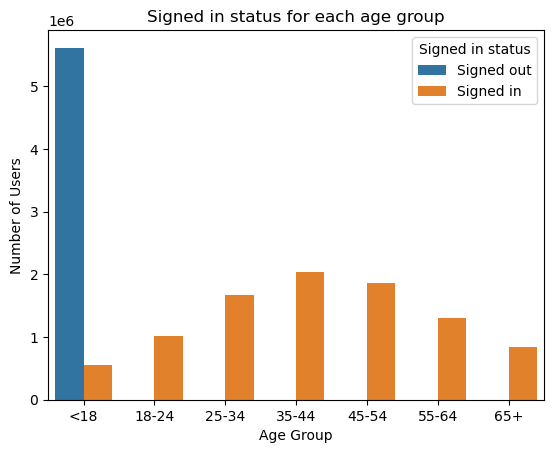

In [5]:
sns.countplot(x='age_group', hue='Signed_In', data=df)
plt.title('Signed in status for each age group')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.legend(title='Signed in status', labels=['Signed out', 'Signed in'])
plt.show()

In [6]:
signed_out_counts = df[df['Signed_In'] == False].groupby('age_group').size()

print("Number of signed out users for each age group:")
print(signed_out_counts)

Number of signed out users for each age group:
age_group
<18      5613610
18-24          0
25-34          0
35-44          0
45-54          0
55-64          0
65+            0
dtype: int64


Проблема:
Користувачі, що не увійшли в акаунт, мають вік 0 та додаються в age_group <18. Оскільки їх вік невідомий, вони повинні розглядатися як окрема категорія користувачів.

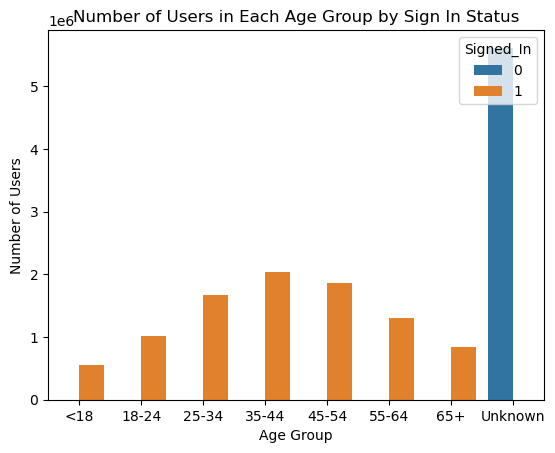

In [7]:
# adding a new 'Unknown' category for signed out users with age=0
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
df['age_group'] = df['age_group'].cat.add_categories('Unknown')
df.loc[(df['Age'] == 0) & (df['Signed_In'] == 0), 'age_group'] = 'Unknown'

sns.countplot(x='age_group', hue='Signed_In', data=df)
plt.title('Number of Users in Each Age Group by Sign In Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.show()

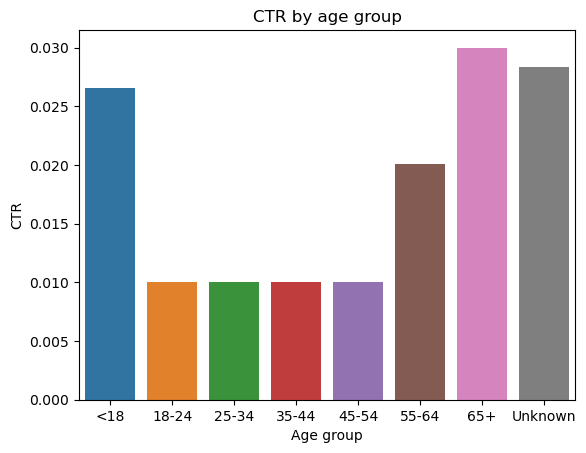

In [8]:
# adding a CTR column
df['CTR'] = df['Clicks'] / df['Impressions']

sns.barplot(x='age_group', y='CTR', data=df, label='CTR', ci=None)
plt.xlabel('Age group')
plt.title('CTR by age group')
plt.show()

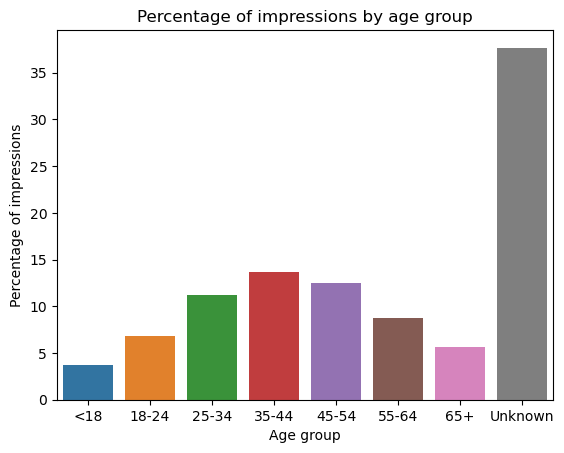

In [9]:
impressions_by_age = (df.groupby('age_group')['Impressions']
                           .sum() / df['Impressions'].sum() * 100).reset_index()

sns.barplot(x='age_group', y='Impressions', data=impressions_by_age, ci=None)
plt.ylabel('Percentage of impressions')
plt.xlabel('Age group')
plt.title('Percentage of impressions by age group')
plt.show()

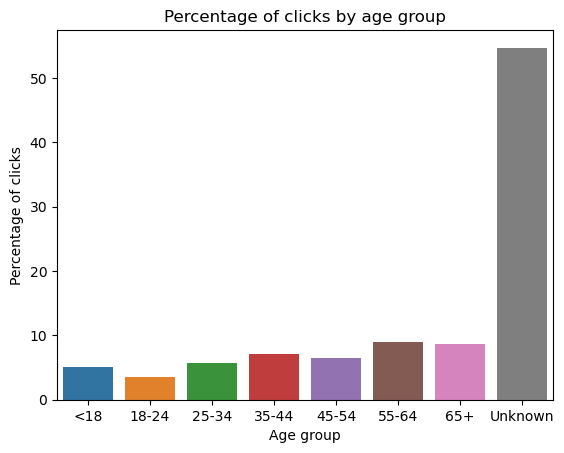

In [10]:
clicks_by_age = (df.groupby('age_group')['Clicks']
                           .sum() / df['Clicks'].sum() * 100).reset_index()

sns.barplot(x='age_group', y='Clicks', data=clicks_by_age, ci=None)
plt.ylabel('Percentage of clicks')
plt.xlabel('Age group')
plt.title('Percentage of clicks by age group')
plt.show()

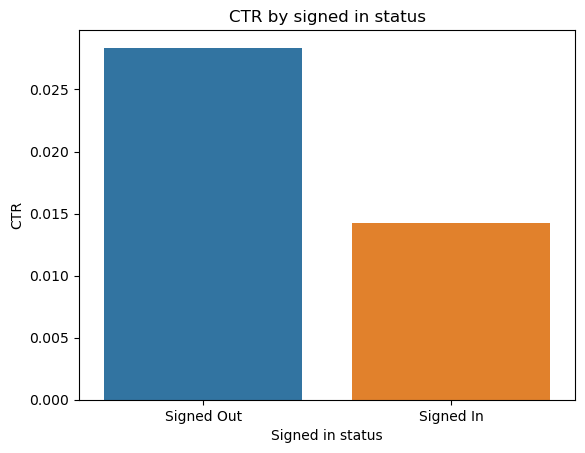

In [11]:
legend_labels = {0: 'Signed Out', 1: 'Signed In'}

sns.barplot(x='Signed_In', y='CTR', data=df, ci=None)
plt.xlabel('Signed in status')
plt.xticks(ticks=[0, 1], labels=['Signed Out', 'Signed In'])
plt.title('CTR by signed in status')
plt.show()

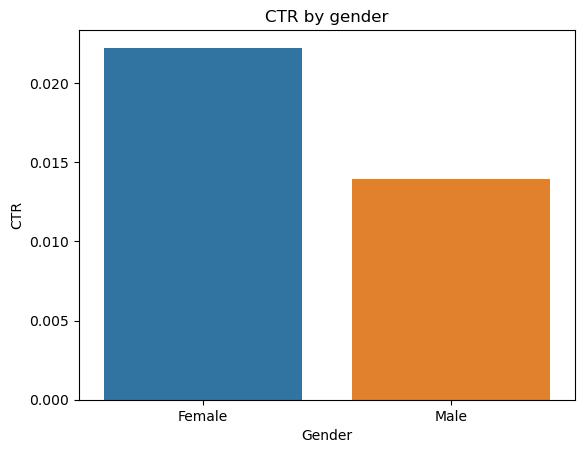

In [12]:
sns.barplot(x='Gender', y='CTR', data=df, ci=None)
plt.xlabel('Gender')
plt.title('CTR by gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

Проблема:
Користувачі, що не увійшли в акаунт, автоматично мають Gender = 0 та помилково розглядаються як жінки. Оскільки їх стать невідома, вони повинні розглядатися як окрема категорія користувачів.

In [13]:
signed_out_users = df[df['Signed_In'] == 0]

female_signed_out_count = signed_out_users[signed_out_users['Gender'] == 0].shape[0]
male_signed_out_count = signed_out_users[signed_out_users['Gender'] == 1].shape[0]

print("Number of signed out female users:", female_signed_out_count)
print("Number of signed out male users:", male_signed_out_count)

Number of signed out female users: 5613610
Number of signed out male users: 0


In [14]:
# updating 'Gender' for signed out users with unknown gender to 'Unknown'
df.loc[(df['Signed_In'] == 0) & (df['Gender'] == 0), 'Gender'] = 'Unknown'

Тепер маємо діаграму, яка коректно відображає CTR по статі:

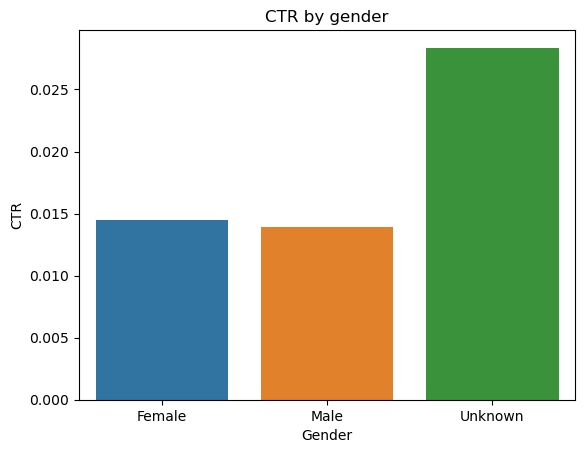

In [15]:
sns.barplot(x='Gender', y='CTR', data=df, ci=None)
plt.xlabel('Gender')
plt.title('CTR by gender')
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'Unknown'])
plt.show()

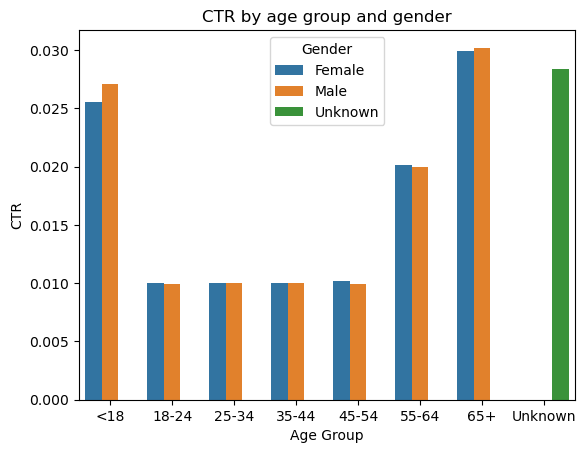

In [16]:
legend_labels = {0: 'Female', 1: 'Male', 2: 'Unknown'}
hue_order = ['Female', 'Male', 'Unknown']

sns.barplot(x='age_group', y='CTR', hue='Gender', data=df, ci=None)
plt.xlabel('Age Group')
plt.legend(title='Gender', labels=legend_labels.values())
plt.title('CTR by age group and gender')
plt.show()

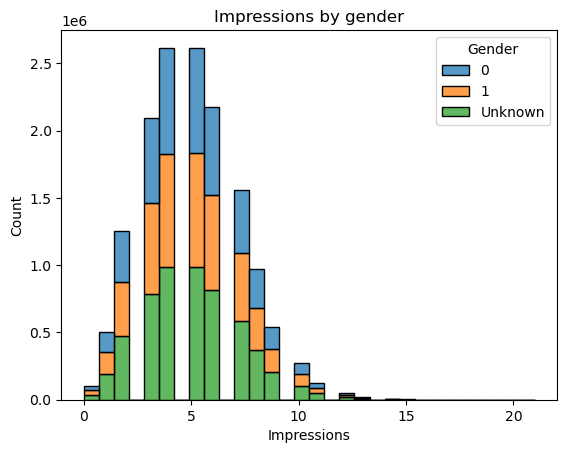

In [18]:
sns.histplot(data=df, x='Impressions', hue='Gender', multiple='stack', bins=30)

plt.title('Impressions by gender')
plt.xlabel('Impressions')
plt.ylabel('Count')
plt.show()

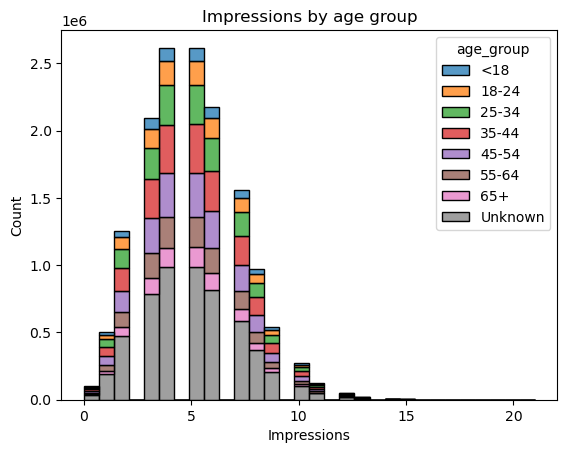

In [19]:
sns.histplot(data=df, x='Impressions', hue='age_group', multiple='stack', bins=30)

plt.title('Impressions by age group')
plt.xlabel('Impressions')
plt.ylabel('Count')
plt.show()

In [ ]:
sns.relplot(
    data=df, kind="line",
    x="age_group", y="Impressions", hue="Gender"
)

plt.legend(title='Impressions by age group and gender')
plt.show()

In [ ]:
sns.violinplot(x="age_group", y="Impressions", data=df, stat="median")
plt.xlabel("Age group")
plt.ylabel("Impressions")
plt.title("Violin plot of impressions by age group")
plt.show()

In [ ]:
sns.violinplot(x="age_group", y="Clicks", data=df, stat="median")
plt.xlabel("Age group")
plt.ylabel("Clicks")
plt.title("Violin plot of clicks by age group")
plt.show()

In [ ]:
sns.violinplot(x="age_group", y="CTR", data=df, stat="median")
plt.xlabel("Age group")
plt.ylabel("CTR")
plt.title("Violin plot of CTR by age group")
plt.show()